# Weekly Session 9

## Goal: 
To master the basics of solving first-order ordinary differential equations (ODEs) by Runge-Kutta methods.

## Readings: 

        * Newman 8.1 First-order differential equations with one variable
        * Newman 8.2 Differential equations with more than one variable
        * Newman 8.3 Second-Order Differential Equations
        * Newman 8.4 Varying the Step Size

In [1]:
#For colored cells, currently blue cells, black text 
#https://stackoverflow.com/questions/18024769/adding-custom-styled-paragraphs-in-markdown-cells
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

<div class=answer>
*This should be a blue cell with black font if you set the filepath correctly*</font>
<div/>

## Exercise 0  <a id='ex0'></a>
*There is an html tag hiding in the line above*

### Terminal Commands in the notebook
Note that you can run basic terminal commands in a jupyter notebook as follows.  Try out a few of your own.  Note that sometimes they just work, but sometimes need to be prefaced with a "!" or a cell magic "%%bash".  Check out the [link](https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/) for more tricks.  

*Side note, in the same link there is a latex cell magic I use sometimes that can be very useful (Markdown has some issues that get annoying).*

Add a comment to each terminal command below to explain what it is doing.  

In [2]:
ls # lists all of the contents in the current directory

 Volume in drive C is OS
 Volume Serial Number is FE3E-5E0A

 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII


 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII


 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII


 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII


 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII


 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII


 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII


 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII


 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII


 Directory of C:\Users\workshop\Documents\Johan\Weekly-Sessions_partII



File Not Found


In [3]:
pwd # a big YOU ARE HERE SIGN

'C:\\Users\\workshop\\Documents\\Johan\\Weekly-Sessions_partII'

In [4]:
cat README.md # reads a file

SyntaxError: invalid syntax (<ipython-input-4-9415f2a7e11f>, line 1)

In [ ]:
!tail README.md # provides perspective of the last 10 lines

### Getting webpage data
The command below "gets" the data from the webpage and prints it.
Once you see what it does, feel free to comment out the line (or clear the cell output). 
A similar command is wget.

*Note that you would have to work harder if you were linked to an html page instead of a pure text file.  That is called "scrapping the web" and is a common data science task.*

In [ ]:
!wget http://www-personal.umich.edu/~mejn/computational-physics/sunspots.txt 

### Piping data into a file
to make the curl command more useful, try piping it into a file (using ">").  Piping is a set of terminal commands that helps you process text on the terminal, but moving data into a file.  Here is some pseudocode to do just that.  Modify the line to pipe the sunspot data into a file named ```sunspots.txt```

        !curl url_name > filename
        
You will need to update the ```url_name``` and ```filename``` to match the task

In [ ]:
# curl is not recognized by the operating system

### Links in Jupyter Notebooks
Way back in Week 1, I included links within the Jupyter notebook so you could navigate more readily.  However, I stopped using them because I couldn't easily guess what would be Monday's work, Wednesday's work, etc.  I've started the process below of creating a linked table of contents for all of the exercises.  **Please complete the table of exercises so you can more easily navigate this notebook.**

*To complete the task, you will need to look at the markdown cells the following links direct to. *

* [Exercise 0](#ex0)
* [Exercise 1](#ex1)
* [Exercise 2](#ex2)
* [Exercise 3](#ex3)
* [Exercise 4](#ex4)

Note that in your Final Project a table of contents with page links will be required.

### Intro to the ticker

The ticker is a very useful feature of Matplotlib that I use regularly to make a plot "just so" for publication.  Here is a nice introduction to its features:
https://matplotlib.org/examples/ticks_and_spines/tick-locators.html

You can run this in a Jupyter Notebook and see a similar plot as the webpage.  Here is a shorter example based on the matplotlib library that would have come in handy last week with the intensity plot you made.  Do the following: 

* Go through and add some comments to understand what this code does.  
* Modify the y-axis so the plot is a log-log plot and apply the LogLocator() to its axes labels as well.
* If you like, you are welcome to try out your intensity plot from last week on it.  You will need to tweak the LogLocator a bit.*

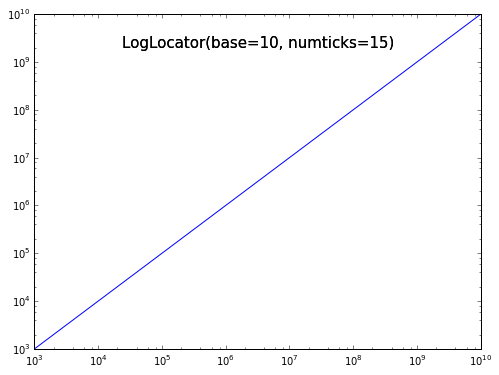

In [4]:
"""
=============
Tick locators
=============

Show the different tick locators.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

x = np.logspace(0,10)  # creates a list of numbers in a log base from 0 to 10
    
plt.figure(figsize=(8, 6))  # adjusts the size of the figure

# Log Locator
ax = plt.subplot(111)
#setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_ylim(10**3, 10**10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x,x) # plots x versus itself, but the xscale was set to log in the previous line

ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.5, 0.9, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes,ha="center")

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.5, 0.9, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes,ha="center")

plt.show()

## Exercise 1 - Euler's method (again) <a id='ex1'></a>
*There is an html tag hiding in the line above* 

The first step, of course, is to set up a function which carries out solution of an ODE.  Newman writes code for all the methods we are considering (Euler, second-order Runge-Kutta, and fourth-order Runge-Kutta).  But, as usual, Newman's coding examples are all single-use *programs*, not general *functions* which can be reused from other programs.  

So, let us fix that situation, and make ourselves a general function!  This is a great opportunity for you to 
    (1) run through how the method works and, even more important, 
    (2) isolate exactly what the "interface'' is (what the inputs and outputs are).

What is the interface you need for a first-order ODE solver? 

Actually, first of all, since this would affect the interface
slightly, what type of problem are we solving in Section~8.1 - *initial value* or *boundary value*?


<div class=answer>
<div/>
It is an initial value problem. You start at a known value and "step" out to determine the rest of the function

First write an ODE solver based on Euler's method.  We will call the function ```solve``` so it can be generalized.  I've gotten you started.

In [45]:
def solve(f,x,interval,steps,order=1):
    """ Solve ODE by Euler or Runge-Kutta methods, with fixed number
    of steps.

    In contrast to the examples of Newman Chapter 8, which build up a
    list, point by point, 
    
    f: function giving ODE as y'=f(x,y)
    x: initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta)
    
    Returns (x,y) points, as (steps+1)x2 numpy array.
    """
    
    #your code here
    #print(order)
    (a,b) = interval
    h = (b-a)/(steps)
    ypoints = np.arange(a,b,h)
    xpoints = []
    
    if (order==1):
        for y in ypoints:
            xpoints.append(x)
            x += h*f(x,y)
    
    elif (order==2):
        for y in ypoints:
            xpoints.append(x)
            k1 = h*f(x,y)
            k2 = h*f(x+0.5*k1,y+0.5*h)
            x += k2
            
    elif (order==4):
        for y in ypoints:
            xpoints.append(x)
            k1 = h*f(x,y)
            k2 = h*f(x+0.5*k1,y+0.5*h)
            k3 = h*f(x+0.5*k2,y+0.5*h)
            k4 = h*f(x+k3,y+h)
            x += (k1+2*k2+2*k3+k4)/6
        
    return xpoints, ypoints
    

#### Use your solver on the equation in Examples 8.1-8.3

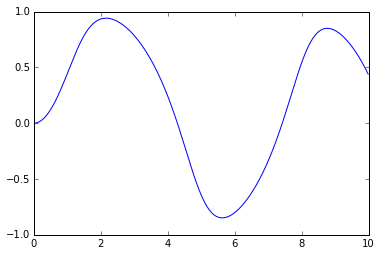

In [46]:
#your code here
from math import sin
def f(x,y):
    return -x**3 + sin(y)

initial = 0
a = 0
b = 10
N = 1000
x,y = solve(f,initial,(a,b),N,order=1)

plt.plot(y,x)
plt.show()

## Exercise 2 - Code Validation and profiling
<a id='ex2'></a>

Okay, so you've written it. It runs. But that's only half the battle. How can we test if it
actually works correctly? Usually I have given you validation tests to run. But, in real life,
you have to come up with your own tests.

**Validate! Validate! Validate! ** *Or you will be sorry later, after you have been using it for a month or two, and you discover that all your results are wrong.*

Do you have any first-order differential equations with known solutions you can test against? Choose one, and please note the equation and solution here. 

<div class=answer>
<div/>
One example is $\dot{y}=\frac{-y^{2}}{2yt+1}$, with an initial condition of $y(1)=-2$. According to the reference book, the initial equation is $y^{2}t+y=2$. Solving for y directly yields: $y=\frac{-1-\sqrt{1+8t}}{2t}$.

Test that your calculated curve approaches the known curve, as you decrease the step size, and plot the results (showing the effect of step size).

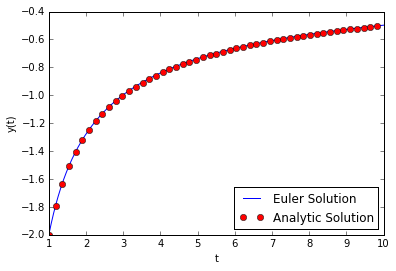

In [81]:
#your code here
def singleOrder (y,t):
    return -y*y/(2*y*t + 1)

def analytic (t):
    return (-1-np.sqrt(1+8*t))/(2*t)

initialvalue = -2
a = 1
b = 10
N = 1000
x,y = solve(singleOrder,initialvalue,(a,b),N,1)

t1 = 1
t2 = 10
h = (t2-t1)/N
t = []
y2 = []
for i in range(N):
    t.append(t1+i*h)
    y2.append(analytic(t1+i*h))


plt.plot(y,x, label = "Euler Solution")
plt.plot(t, y2, 'ro', markevery=20, label = "Analytic Solution")
plt.legend(loc = 'best')
plt.xlabel("t")
plt.ylabel("y(t)")

plt.show()

On the basis of Newman's discussion of the matter, what "order'' is Euler's method, and what does this mean in terms of the expected dependence of errors on the step size?

<div class=answer>
<div/>
According to Newman, Euler's Method is the first order Runge-Kutta Method, which means it neglects the second order terms. These are what contribute to the error, particularly in the number of steps needed to reduce the error.

### Basic Code Profiling 
Now I would be curious to see if the error on your results really does
scale with the step size as expected from
Newman's analysis.  Look at the calculated value of your function once we
get to the right endpoint of the interval.  Investigate this and
summarize your results.  

*You can simply write a table of relevant numbers,
based on the test runs you have already done,
and explain.  (But, if you want to get really fancy, you can also do
plots like we did for the integration errors as a function of step
size.)*

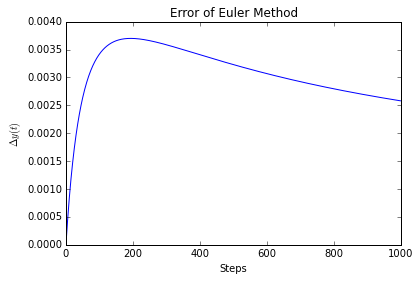

In [82]:
#your code here
error1 = []
for i in range(N):
    calc = x[i]-y2[i]
    error1.append(calc)
    
plt.title("Error of Euler Method")
plt.plot(error1)
plt.xlabel("Steps")
plt.ylabel("$\Delta y(t)$")
plt.show()

<div class=answer>
<div/>
At the very first step, or the initial condition, there is no difference between the two solutions. This makes sense, because they both start with the exact same value, which forms the solution at the lower bound. As the steps increase, there is a rapid increase in error towards a maximum, but this tails off passed the maximum, getting more accurate as the functions continue.

## Exercise 3 - Runge-Kutta methods <a id='ex3'></a>

Now that you have your ODE solver in place, it is easy to add new solution methods to it.  Modify ```solve``` so that it accepts an optional argument ```order```, to switch between Euler, second-order Runge-Kutta, and fourth-order Runge-Kutta methods.

Test these solution methods out on the same ODE's you used above with Euler's method.  Again, make a plot showing how these functions work with different step sizes.

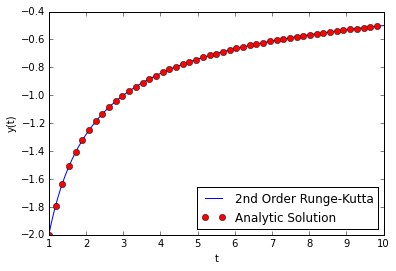

In [83]:
x,y = solve(singleOrder,initialvalue,(a,b),N,order=2)

plt.plot(y,x, label = "2nd Order Runge-Kutta")
plt.plot(t, y2, 'ro', markevery=20, label = "Analytic Solution")
plt.legend(loc = 'best')
plt.xlabel("t")
plt.ylabel("y(t)")

plt.show()

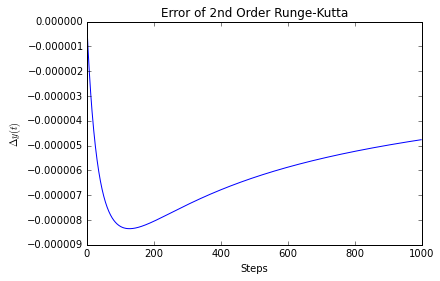

In [84]:
error2 = []
for i in range(N):
    calc = x[i]-y2[i]
    error2.append(calc)

plt.title("Error of 2nd Order Runge-Kutta")
plt.plot(error2)
plt.xlabel("Steps")
plt.ylabel("$\Delta y(t)$")
plt.show()

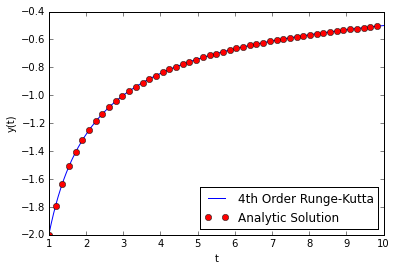

In [85]:
x,y = solve(singleOrder,initialvalue,(a,b),N,order=4)

plt.plot(y,x, label = "4th Order Runge-Kutta")
plt.plot(t, y2, 'ro', markevery=20, label = "Analytic Solution")
plt.legend(loc = 'best')
plt.xlabel("t")
plt.ylabel("y(t)")

plt.show()

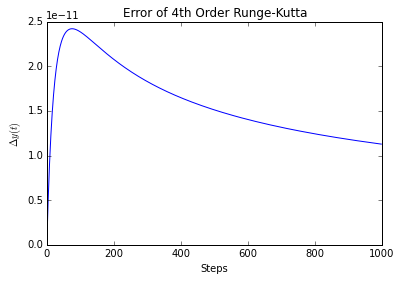

In [86]:
error3 = []
for i in range(N):
    calc = x[i]-y2[i]
    error3.append(calc)
    
plt.title("Error of 4th Order Runge-Kutta")
plt.plot(error3)
plt.xlabel("Steps")
plt.ylabel("$\Delta y(t)$")
plt.show()

In [105]:
print("Steps","Euler","Second Order","Fourth Order" )
print("-------------------------------------")

for i in range(N):
    print("%4.5E %4.5E %4.5E %4.5E"%(i+1, error1[i], error2[i], error3[i]))

Steps Euler Second Order Fourth Order
-------------------------------------
1.00000E+00 0.00000E+00 0.00000E+00 0.00000E+00
2.00000E+00 9.51910E-05 -2.95703E-07 1.37002E-12
3.00000E+00 1.87626E-04 -5.80324E-07 2.66187E-12
4.00000E+00 2.77402E-04 -8.54340E-07 3.88067E-12
5.00000E+00 3.64612E-04 -1.11821E-06 5.02998E-12
6.00000E+00 4.49345E-04 -1.37236E-06 6.11466E-12
7.00000E+00 5.31686E-04 -1.61720E-06 7.13851E-12
8.00000E+00 6.11718E-04 -1.85313E-06 8.10574E-12
9.00000E+00 6.89518E-04 -2.08051E-06 9.01834E-12
1.00000E+01 7.65162E-04 -2.29969E-06 9.88143E-12
1.10000E+01 8.38721E-04 -2.51102E-06 1.06968E-11
1.20000E+01 9.10265E-04 -2.71481E-06 1.14675E-11
1.30000E+01 9.79860E-04 -2.91136E-06 1.21958E-11
1.40000E+01 1.04757E-03 -3.10097E-06 1.28844E-11
1.50000E+01 1.11346E-03 -3.28391E-06 1.35361E-11
1.60000E+01 1.17758E-03 -3.46045E-06 1.41522E-11
1.70000E+01 1.23999E-03 -3.63083E-06 1.47349E-11
1.80000E+01 1.30074E-03 -3.79529E-06 1.52867E-11
1.90000E+01 1.35990E-03 -3.95407E-06 1.5808

<div class=answer>
<div/>


## Exercise 4 - Newman Exercise 8.1 <a id='ex4'></a>

On page 339 of Newman, there is shown a simple electronic circuit with one resistor and one capacitor.  This circuit acts as a low-pass filter: you send a signal in on the left and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has very high impedance, so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows.  Let $I$ be the current that flows through $R$ and into the capacitor, and let $Q$ be the charge on the capacitor.  Then:
$$
\begin{align}
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = {d Q\over dt}.
\end{align}
$$

Substituting the second equation into the third, then substituting the
result into the first equation, we find that $V_\textrm{in} -
V_\textrm{out} = RC\>({dV_\textrm{out}/dt})$, or equivalently

$$
\begin{align}
{ dV_\textrm{out}\over dt} &= {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).
\end{align}
$$

Write a program (or modify a previous one) to solve this equation for $V_\textrm{out}(t)$ using the fourth-order Runge-Kutta method when in the input signal is a square-wave with frequency~1 and amplitude~1:
$$
\begin{equation}
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
\end{equation}
$$

where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer.
Use the program to make plots of the output of the filter circuit from $t=0$ to $t=10$ when $RC=0.01$, $0.1$, and $1$, with initial condition $V_\textrm{out}(0)=0$.  You will have to make a decision about
what value of $h$ to use in your calculation.  Small values give more accurate results, but the program will take longer to run.  Try a variety of different values and choose one for your final calculations that seems
sensible to you.  

In [ ]:
#your code here

Based on the graphs produced by your program, describe what you see
  and explain what the circuit is doing.

<div class=answer>
<div/>
Answer here

A program similar to the one you wrote is running inside most stereos and music players, to create the effect of the "bass'' control.  In the old days, the bass control on a stereo would have been connected to a real
electronic low-pass filter in the amplifier circuitry, but these days there is just a computer processor that simulates the behavior of the filter in a
manner similar to your program.

**Disclaimer from (Mark Caprio):** Well, sort of.  Digital signal processing is usually actually based on much simpler algorithms, which look sort of like recurrence relations.  A digital low-pass filter would have a similar *frequency response* to a physical low-pass filter, but it is not meant to strictly simulate one.  So the algorithm can be much simpler than a Runge-Kutta solver!  Let us denote the input voltages at the different time steps ($t_i=t_0+ ih$) by $x_i$. Then the output voltages $y_i$ would be given by a rule such as
$$
y_i = \alpha x_i + (1-\alpha) y_i, 
$$
where $\alpha=h/(RC+h)$.

See also
http://en.wikipedia.org/wiki/Low-pass#Discrete-time_realization.


## Lab Exercises (subject to modification)

* Newman 8.2 - The Lotka-Volterra equations
* Newman 8.3 - The Lorenz equations
* Newman 8.4 - The non-linear pendulum
* Newman 8.5 - The driven pendulum

*This is a lot - I know this.  There may be some adjustments.*



In [ ]:
# add code and cells as necessary.